# Probability Distributions

Three most common probaiblity distributions are:
* Uniform
* Exponential
* Gaussian

For uniform distribution:

$$
\rho_{uniform}(x) = \dfrac{1}{b-a} \quad \mbox{ for } a \leq x < b
$$

For exponential distribution:

$$
\rho_{exponential}(t) = \dfrac{ e^{-\frac{t}{\tau}} }{ \tau } \mbox{ for } t \geq 0
$$

For Gaussian distribution:

$$
\rho_{Gaussian}(v) = \dfrac{1}{\sqrt{2 \pi \sigma}} e^{-\frac{v^2}{2\sigma^2}}
$$

where $\rho$ denotes the probability density function (PDF).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part A: Likelihoods

What is the probability that a random number uniform on $[0,1)$ will happen to lie between x = 0.7 and x = 0.75?

**Answer:**

$$
P(0.7 \leq 0.75) = \dfrac{ \int_{0.7}^{0.75} \rho(x) dx }{ \int_{0}^{1} \rho(x) dx } = \dfrac{ 0.75-0.7 }{ 1 - 0 } = 0.05
$$

In [2]:
n = 10000
sim = np.random.rand(n,)
inside = len(sim[(sim>0.7)&(sim<0.75)])
print("Percentage = %d / %d = %0.4f"%(inside, n, inside/n))

Percentage = 483 / 10000 = 0.0483


What is probability that waiting time for radioactive decay of nucleus is more than twice the exponential decay time $\tau$?

**Answer:**

$$
P(t > 2 \tau) = 
\dfrac{  \int_{2 \tau}^{\infty} \exp(-t/\tau) / \tau dt  }{  \int_{0}^{\infty} \exp(-t/\tau) / \tau dt  }
$$

Denominator evaluates to:

$$
\int_{0}^{\infty} \exp(-t/\tau) / \tau dt = 0 + e^0 = 1
$$

Numerator evaluates to:

$$
\int_{2 \tau}^{\infty} \exp(-t / \tau) / \tau dt 
= \left[ -e^{-t/\tau} \right]_{2\tau}^{\infty} = 0 + e^{-2}
$$

for an overall probability of:

$$
P(t > 2 \tau) = \dfrac{1}{e^{2}} \sim 0.135
$$

In [3]:
print(1.0/np.exp(2))

0.1353352832366127


In [4]:
tau = 1
n = 10000
sim = np.random.exponential(scale=tau, size=(n,))
inside = len(sim[sim>2*tau])
print("Percentage = %d / %d = %0.4f"%(inside, n, inside/n))

Percentage = 1379 / 10000 = 0.1379


What is probability that your score on an exam with a Gaussian distribution is greater than $2 \sigma$ above the mean?

Note:

$$
\int_{2}^{\infty} \frac{1}{\sqrt{2 \pi}} \exp(-v^2/2) dv = \dfrac{1 - \mbox{erf}(\sqrt{2}) }{ 2 } \sim 0.023
$$

**Answer:**

The probability of a score greater than $2 \sigma$ above the mean is given by:

$$
P(x > 2 \sigma) = \dfrac{  \int_{2 \sigma}^{\infty} \rho_{Gaussian}(x) dx  }{  \int_{-\infty}^{\infty} \rho_{Gaussian}(x) dx  }
$$

The expression in the denominator is equal to 1.

The expression in the numerator is equal to:

$$
\dfrac{1}{ \sqrt{2 \pi \sigma^2}} \int_{2 \sigma}^{\infty} \exp \left( -\dfrac{p^2}{2\sigma^2} \right) dp = 
\dfrac{1}{ \sqrt{2 \pi \sigma^2}} \left[ \int_{-\infty}^{\infty} \exp \left( -\dfrac{p^2}{2\sigma^2} \right) dp 
- \int_{-\infty}^{2 \sigma} \exp \left( -\dfrac{p^2}{2\sigma^2} \right) dp \right] \\
= \dfrac{1}{ \sqrt{2 \pi \sigma^2}} \left[ \int_{0}^{\infty} \exp \left( -\dfrac{p^2}{2\sigma^2} \right) dp 
- \int_{0}^{2\sigma} \exp \left( -\dfrac{p^2}{2\sigma^2} \right) dp \right]
$$

Now the first term becomes:

$$
\dfrac{1}{ \sqrt{2 \pi \sigma^2}} \int_{0}^{\infty} \exp \left( -\dfrac{p^2}{2\sigma^2} \right) dp = \frac{1}{2}
$$

and the second integral can be evaluated:

$$
\int_{-\infty}^{2 \sigma} \dfrac{1}{2 \pi \sigma^2} \exp \left( -\dfrac{p^2}{2\sigma^2} \right) dp = \dfrac{1}{\sqrt{\pi}} \int_{0}^{\sqrt{2}} \exp( -t^2 ) dt \\
= \dfrac{\mbox{erf}(\sqrt{2})}{2}
$$

Together, these make the overall integral evaluate to:

$$
\dfrac{1}{ \sqrt{2 \pi \sigma^2}} \int_{2 \sigma}^{\infty} \exp \left( -\dfrac{p^2}{2\sigma^2} \right) dp = \dfrac{1 - \mbox{erf}(\sqrt{2})}{2}
$$

In [5]:
from scipy.special import erf
print((1-erf(np.sqrt(2)))/2)

0.02275013194817921


In [6]:
n = 10000
mu = 0
sigma = 3
sim = sigma*np.random.randn(n,) + mu
inside = len(sim[sim>2*sigma])
print("Percentage = %d / %d = %0.4f"%(inside, n, inside/n))

Percentage = 240 / 10000 = 0.0240


## Part B: Normalization, Mean, and Standard Deviation

Show that these probability distributions are normalized: $\int \rho(x) dx = 1$.

What is the mean $x_0$ of each distribution?

What is the standard deviation $\sigma$, where $\sigma^2 = \int \left(x-x_0\right)^2 \rho(x) dx$?

### Uniform Distribution

Mean of uniform distribution is $\dfrac{b+a}{2}$, and the variance is $V = \dfrac{(b-a)^2}{12}$, making the standard deviation $\sigma = \dfrac{b - a}{2 \sqrt{3}}$.

### Exponential Distribution

The mean of the exponential distribution is $\tau$, and the standard deviation $\sigma = \tau$ too.

The variance is $\tau^2$.

### Gaussian Distribution

Mean of Gaussian distribution is $\mu$, standard deviation is $\sigma$.

## Sum of Uniform Random Variables

In [7]:
import seaborn as sns

In [8]:
x1 = np.random.rand(10000,)
x2 = np.random.rand(10000,)

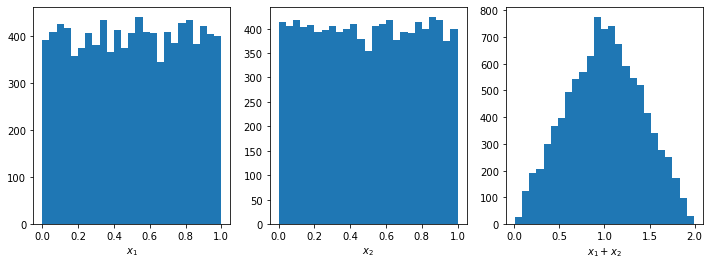

In [10]:
x = x1 + x2

fig = plt.figure(figsize=(12,4))
ax1, ax2, ax3 = [fig.add_subplot(1,3,i+1) for i in range(3)]

ax1.hist(x1,  bins=25)
ax2.hist(x2,  bins=25)
ax3.hist(x,  bins=25)

ax1.set_xlabel(r'$x_1$')
ax2.set_xlabel(r'$x_2$')
ax3.set_xlabel(r'$x_1 + x_2$')

plt.show()

In [11]:
def draw_uniform_sums(nx):

    tot = 10000

    xs = []
    xsum = np.zeros(tot,)
    for x in range(nx):
        x = np.random.rand(tot,)
        xsum += x
        xs.append(x)

    fig = plt.figure(figsize=(14,2))
    axes = [fig.add_subplot(1,nx,i+1) for i in range(nx)]

    for i, (ax, x) in enumerate(zip(axes,xs)):
        ax.hist(x,  bins=25)
        ax.set_xlabel(r'$x_%d$'%(i+1))

    fig2 = plt.figure(figsize=(4,4))
    ax2 = fig2.add_subplot(1,1,1)
    ax2.hist(xsum,  bins=25)
    ax2.set_xlabel(r'$\Sigma x_i$')
    
    plt.show()

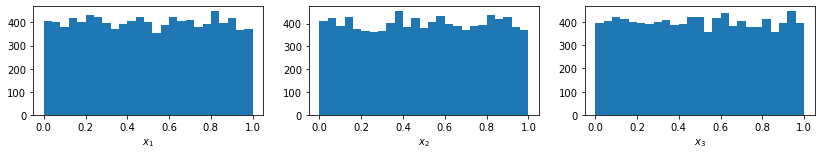

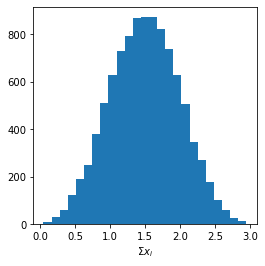

In [12]:
draw_uniform_sums(3)

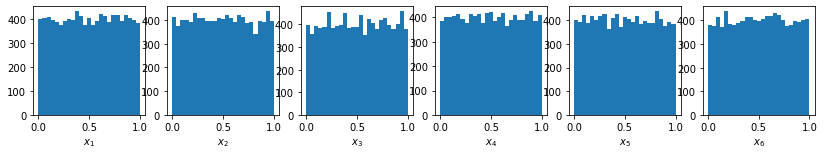

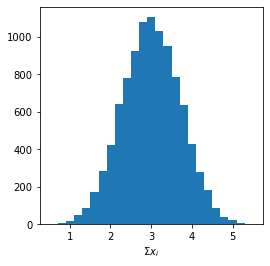

In [13]:
draw_uniform_sums(6)

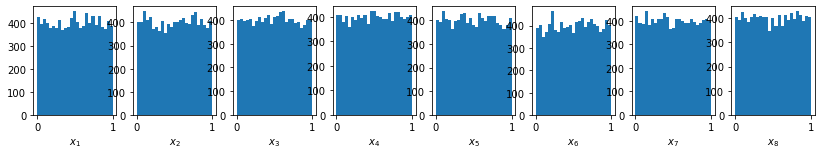

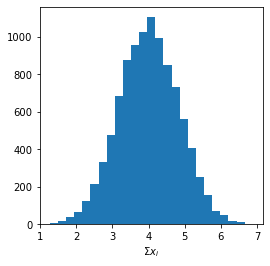

In [14]:
draw_uniform_sums(8)